In [63]:
from core.Generators import Generator
from core.Discriminator import Discriminator 
from Gan_train import Gray_GanTrainer
from config import CycleGANConfig as config
from core.data_loader import Gray_RGB_dataset,get_gray_train_loader,get_gray_test_loader, get_train_loader
from torchsummary import summary
import torch
import argparse
import torchvision.utils as tvutils
import os
from torchvision import transforms
from Gan_main import main

In [25]:
img=Image.open("data/afhq/train/wild/flickr_wild_000003.jpg").convert("L")
img.save("gray2.jpg")

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
vgg = Generator().to(device) 
summary(vgg, (3, 256, 256))


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
vgg = Discriminator().to(device) 
summary(vgg, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             864
         LeakyReLU-2         [-1, 32, 256, 256]               0
            Conv2d-3         [-1, 64, 128, 128]          18,432
         LeakyReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
         LeakyReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8          [-1, 128, 64, 64]          73,728
         LeakyReLU-9          [-1, 128, 64, 64]               0
           Conv2d-10          [-1, 128, 64, 64]         147,456
      BatchNorm2d-11          [-1, 128, 64, 64]             256
        LeakyReLU-12          [-1, 128, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         294,912
      BatchNorm2d-14          [-1, 256,

In [64]:
from core.Generators import Generator,Generator_Mod
from core.Discriminator import Discriminator,Discriminator_Mod
from Gan_train import Gray_GanTrainer
from config import CycleGANConfig as config
from core.data_loader import DefaultDataset,get_test_loader
from torchsummary import summary
import torch
import torchvision
import argparse
import torchvision.utils as tvutils
import os
from torchvision import transforms
from Gan_main import main
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils import data

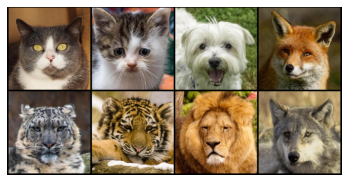

In [74]:
transform=transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([256,256])
                              ])
dataset=DefaultDataset('./data/test',transform=transform)
loader=data.DataLoader(dataset=dataset,batch_size=8)
torch_to_image = transforms.Compose([
    transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
    transforms.ToPILImage()
])
for img in loader:
  plt.axis('off')
  plt.imshow(torchvision.utils.make_grid(img,nrow=4,padding=5,pad_value=0.0,normalize=True).permute(1,2,0))
  plt.savefig("test",dpi=500)
  plt.show()